## Installing Dependencies

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial langchain_community pypdf faiss-cpu sentence_transformers langgraph langchain_huggingface langchain_core langsmith langchain

In [2]:
import getpass
import os

def _set_if_undefined(var :str) -> None:
  if os.environ.get(var):
    return
  os.environ[var] = getpass.getpass(var)

_set_if_undefined("HF_TOKEN")
_set_if_undefined("TAVILY_API_KEY")
_set_if_undefined("LANGCHAIN_API_KEY")
_set_if_undefined("LANGCHAIN_ENDPOINT")

HF_TOKEN··········
TAVILY_API_KEY··········
LANGCHAIN_API_KEY··········
LANGCHAIN_ENDPOINT··········


In [3]:
from langchain_huggingface import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer

embedding_model = HuggingFaceEmbeddings(model_name ="sentence-transformers/all-MiniLM-L6-v2" )

In [4]:
from langchain_huggingface import HuggingFaceEndpoint,ChatHuggingFace
ll = HuggingFaceEndpoint(
    repo_id="meta-llama/Llama-3.2-3B-Instruct",
    task="text-generation",

)
model1 = ChatHuggingFace(llm=ll,temperature = 0)
result = model1.invoke("hello?")
print(result.content)

Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?


## PDF-Retrieval chain

In [5]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS

In [6]:
loader = PyPDFLoader("/content/3 (1).pdf")
docs = loader.load()
print(len(docs))

splitter = RecursiveCharacterTextSplitter(
    chunk_size =250,
    chunk_overlap = 50
)

chunks = splitter.split_documents(docs)
print(len(chunks))

26
369


In [7]:
vector_store = FAISS.from_documents(chunks, embedding_model)

In [8]:
vector_store.index_to_docstore_id

{0: '2c5c34ff-1acc-4a97-aa13-0e7583abe5b8',
 1: '8a69db06-f093-4ab4-94c1-636e8b1ca628',
 2: 'a6966068-88a6-45b6-a409-a0a690d34d9f',
 3: 'ecdc1497-9133-418a-a469-37bf14ad8b55',
 4: '5fe65426-1fc8-4ef5-8551-385abc038171',
 5: '29e6bea5-fe51-4ced-a655-658d38516eaa',
 6: '2d5e7a38-b349-4d47-bd7d-7685e4ee2634',
 7: 'b84e0071-7097-414b-b37a-a0ae91acf640',
 8: '005e1be1-7521-459b-84fc-2119e50b4d2f',
 9: '55ad45e3-e639-4afb-b043-073808f98293',
 10: '82bf042e-f67e-4e19-b5c9-5bd9760a5f21',
 11: '97198d13-f4f1-4adb-9faa-0ae2ebf19d83',
 12: '19162d97-ea94-4adc-a20e-6f110a51ffce',
 13: '4f655594-d9d9-45d8-a34f-8d8fc24fd325',
 14: 'f6c35478-37f7-44b9-a8d9-0cc7c49df44f',
 15: 'd22688f9-5332-4cad-9de8-105379ce1039',
 16: 'f62a6f75-255f-4026-8b34-09fb240f3eb2',
 17: '466a1b2b-9a9e-4026-ba50-a85d46fdeab3',
 18: 'bc6a25d6-85d9-42f2-a7ad-d6d0286933b4',
 19: '2363e9ef-a2b0-4fdb-9d4f-853bb907c30f',
 20: 'abd3c889-1f3f-4a79-8875-1deeb30c0efb',
 21: 'fd6f2656-b5f4-4d8b-8d74-cfd238dcf133',
 22: '4d4e2867-029a-

In [9]:
vector_store.get_by_ids(['8b91a9d7-aee3-4e2a-8635-1a0850fed34b'])

[Document(id='8b91a9d7-aee3-4e2a-8635-1a0850fed34b', metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-01-12T12:07:23-08:00', 'author': '', 'title': '', 'subject': '', 'keywords': '', 'moddate': '2025-01-12T12:07:23-08:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'source': '/content/3 (1).pdf', 'total_pages': 26, 'page': 25, 'page_label': '26'}, page_content='26 Chapter 3 • N-gram Language Models\nStolcke, A. 2002. SRILM – an extensible language modeling\ntoolkit. ICSLP.\nTrnka, K., D. Yarrington, J. McCaw, K. F. McCoy, and\nC. Pennington. 2007. The effects of word prediction on')]

In [10]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 2})

In [11]:
question = "what is bigram?"

In [12]:
docs = retriever.invoke('what is bigram ?')
print(docs)

[Document(id='0460b879-26c5-4400-9146-54e3ea7ff38e', metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-01-12T12:07:23-08:00', 'author': '', 'title': '', 'subject': '', 'keywords': '', 'moddate': '2025-01-12T12:07:23-08:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'source': '/content/3 (1).pdf', 'total_pages': 26, 'page': 2, 'page_label': '3'}, page_content='words.\nThe bigram model, for example, approximates the probability of a word givenbigram\nall the previous words P(wn|w1:n−1) by using only the conditional probability given'), Document(id='f6c35478-37f7-44b9-a8d9-0cc7c49df44f', metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-01-12T12:07:23-08:00', 'author': '', 'title': '', 'subject': '', 'keywords': '', 'moddate': '2025-01-12T12:07:23-08:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, V

## Relevance Evaluation of Retrieved Documents

In [13]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser


system_prompt = """
You are a grader assessing whether a retrieved document is relevant to a user question.
If the document has content that matches or semantically relates to the question, say "yes".
If not, say "no".
Reply with only "yes" or "no" — nothing else.
"""

grade_prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "Retrieved document:\n\n{document}\n\nUser question: {question}"),
])

retrieval_grader_chain = grade_prompt | model1 | StrOutputParser()

output = retrieval_grader_chain.invoke({"document": docs, "question": question})
print(output)


yes


## Answer Generation Chain

In [14]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

#print(prompt)
rag_chain = prompt | model1 | StrOutputParser()


In [15]:
generation = rag_chain.invoke({"context": format_docs(docs), "question": question})
print(generation)

A bigram is a sequence of two words, where the probability of the second word is determined by the previous word. It is a type of n-gram, specifically an n-gram of length 2. Bigrams are used in language models to predict the next word in a sequence.


## Question Re-write

In [16]:

system = """
 You are a question re-writer that converts an input question to a better version that is optimized
for web search. Look at the input and try to reason about the underlying semantic intent / meaning.
Just give only rewritten question Dont give anything explanation.

"""

re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system",system),
        ("human","Here is the initial question :\n\n {question} \n Formulate an improved question.",),

    ]
)

question_rewriter = re_write_prompt | model1 | StrOutputParser()

In [17]:
question = " what is bigram ?"

In [18]:
# Run chain and output results
print(f'[Original question]: "{question}"')
print("[Query-rewrite]:", question_rewriter.invoke({"question": question}))

[Original question]: " what is bigram ?"
[Query-rewrite]: What is a bigram in natural language processing?


## Web Search Tool

In [19]:
from langchain.tools.tavily_search import TavilySearchResults
web_search_tool = TavilySearchResults(max_results = 3)

/tmp/ipython-input-19-2978049463.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  web_search_tool = TavilySearchResults(max_results = 3)


In [20]:
# Execute web search tool
results = web_search_tool.invoke({"query": question})
print(results)

[{'title': 'Bigram - Wikipedia', 'url': 'https://en.wikipedia.org/wiki/Bigram', 'content': 'A bigram or digram is a sequence of two adjacent elements from a string "String (computer science)") of tokens "Token (parser)"), which are typically letters, syllables, or words. A bigram is an _n_-gram for _n_=2.\n\nThe frequency distribution of every bigram in a string is commonly used for simple statistical analysis of text in many applications, including in computational linguistics, cryptography, and speech recognition. [...] _Gappy bigrams_ or _skipping bigrams_ are word pairs which allow gaps (perhaps avoiding connecting words, or allowing some simulation of dependencies, as in a dependency grammar).\n\nApplications\n------------\n\n[edit]\n\nBigrams, along with other n-grams, are used in most successful language models for speech recognition.(\n\nBigram frequency attacks can be used in cryptography to solve cryptograms. See frequency analysis "Frequency analysis (cryptanalysis)").', 'sc

## State


In [21]:
from typing import Annotated , List , TypedDict

class AgentState(TypedDict):
  question : Annotated[str," The question to answer"]
  generation : Annotated[str , "The generation from the llm"]
  web_search : Annotated[str , "Whether to add search"] # yes or no
  documents : Annotated [ List[str] , " The documents received "]

## Node

In [22]:
from langchain.schema import Document

def retrieve( state : AgentState) -> AgentState:
  print("Retrieve")

  question = state["question"]

  documents = retriever.invoke(question)
  return {"documents" : documents}


def generate(state : AgentState) -> AgentState:
  print( "Generate")

  question = state["question"]
  documents = state["documents"]

  generation = rag_chain.invoke({"context" : documents ,"question" : question })
  return {"generation" : generation}


def grade_documents(state: AgentState)->AgentState:
    print("\n CHECK DOCUMENT RELEVANCE TO QUESTION \n")
    question = state["question"]
    documents = state["documents"]

    # Filtered documents
    filtered_docs = []
    relevant_doc_count = 0

    for d in documents:
        # Evaluate the relevance of Question-Document pairs.
        score = retrieval_grader_chain.invoke(
            {"question": question, "document": d.page_content}
        )
        grade = score

        if grade == "yes":
            print(" GRADE: DOCUMENT RELEVANT ")
            # Add relevant documents to filtered_docs.
            filtered_docs.append(d)
            relevant_doc_count += 1
        else:
            print(" GRADE: DOCUMENT NOT RELEVANT ")
            continue

    # If no relevant documents are found, perform a web search.
    web_search = "Yes" if relevant_doc_count == 0 else "No"
    return {"documents": filtered_docs, "web_search": web_search}

def query_rewrite(state : AgentState) -> AgentState:
  print(" Rewrite Query")
  question = state["question"]
  better_question = question_rewriter.invoke({"question" : question})
  print(better_question)
  return {"question": better_question}

def web_search(state : AgentState) -> AgentState:
  print("Web Search")
  question = state["question"]
  documents = state["documents"]

  docs = web_search_tool.invoke({"query" : question})

  web_results = "\n".join(d["content"] for d in docs)
  web_results = Document(page_content = web_results)
  documents.append(web_results)

  return {"documents" : documents}





## Function for conditional edges

In [23]:
def decide_to_generate(state:AgentState) -> AgentState:
  print(" Assess Graded Documents")
  web_search = state["web_search"]

  if web_search == "Yes" :
    print("All Documents are not relevant to question , Query Rewrite")
    return "query_rewrite"

  else:
    print("Decision : Generate")
    return "generate"


## Graph Creation

In [24]:
from langgraph.graph import END,StateGraph , START

graph = StateGraph(AgentState)
graph.add_node("retrieve" , retrieve)
graph.add_node("grade_documents",grade_documents)
graph.add_node("generate" , generate)
graph.add_node("query_rewrite" , query_rewrite)
graph.add_node("web_search_node" ,web_search)

graph.add_edge(START , "retrieve")
graph.add_edge("retrieve" , "grade_documents")

graph.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "query_rewrite" : "query_rewrite",
        "generate"  : "generate",
    },
)

graph.add_edge("query_rewrite","web_search_node")
graph.add_edge("web_search_node","generate")
graph.add_edge("generate" , END)

app = graph.compile()

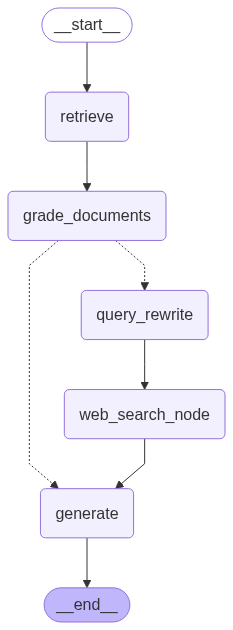

In [25]:
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

## Graph Execution


In [27]:
from langchain_core.runnables import RunnableConfig
from uuid import uuid4

config = RunnableConfig(recursion_limit=20 , configurable={"thread_id" :uuid4()})

input = {
    "question" : "What is Markov Assumption in N-grams?",

}

for output in app.stream(input , config , stream_mode = "updates"):
  for key ,value in output.items():
    print(f"Output from node '{key}':")
    #print(value)
    print("\n---\n")

print(value["generation"])


Retrieve
Output from node 'retrieve':

---


 CHECK DOCUMENT RELEVANCE TO QUESTION 

 GRADE: DOCUMENT RELEVANT 
 GRADE: DOCUMENT RELEVANT 
 Assess Graded Documents
Decision : Generate
Output from node 'grade_documents':

---

Generate
Output from node 'generate':

---

The Markov assumption in N-grams states that the probability of a word depends only on the previous word. This assumption is used to simplify the computation of word probabilities in N-gram models. It approximates the history of a word by just the last few words.
